In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import slab_workflow
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import sys
sys.path.insert(1, '/Users/andrew/Documents/python/pygplates_rev28_python37_MacOS64')
import pygplates
import matplotlib as mpl
mpl.rcParams['lines.solid_capstyle'] = 'round'
mpl.rcParams['lines.solid_joinstyle'] = 'round'
#from matplotlib import cm
from cmcrameri import cm

In [2]:
#set directories
platedir = '/Users/andrew/Documents/GitHub/EarthBytePlateMotionModel-ARCHIVE/Muller++_2015_AREPS_CORRECTED/'
savedir = '/Users/andrew/Documents/Data/Merdith_sub_zones/'
datadir = '/Users/andrew/Documents/Data/Merdith_sub_zones/'
figuredir = '/Users/andrew/Documents/scripts_output/serpentinte_subduction_zones/'
#model files
rotfile = '%sGlobal_EarthByte_230-0Ma_GK07_AREPS.rot' % platedir
COBs = '%sAgeGridInput/Global_EarthByte_230-0Ma_GK07_AREPS_COB_Terranes.gpml' % platedir
coastlines = '%sGlobal_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpml' % platedir
isochrons = '%sAgeGridInput/Global_EarthByte_230-0Ma_GK07_AREPS_Isochrons.gpml' % platedir
input_topology_filename = ['%sGlobal_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpml' % platedir,
                           '%sGlobal_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml' % platedir]

rotation_model = pygplates.RotationModel(rotfile)

#topologies for our subduction points
time = 0 

resolved_topologies = []
shared_boundary_sections = []

pygplates.resolve_topologies(input_topology_filename, rotation_model,
                             resolved_topologies, int(time), shared_boundary_sections)
#deterministic output
shared_boundary_sections = sorted(shared_boundary_sections, 
                                  key=lambda section : section.get_feature().get_feature_id().get_string())

#some densities
perid_density_g_cm3 = 3.3 #g/cm3
perid_density_g_km3 = perid_density_g_cm3 * 100000**3
perid_density_kg_km3 = perid_density_g_km3 * 1e-3

In [3]:
mid_point, sub_length, segments, polarity = slab_workflow.get_sub_parameters(shared_boundary_sections)

Unable to find the overriding plate of the subducting shared sub-segment "So Melanesian-MG-5-20-07"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "So Melanesian-MG-5-20-07"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding plate of the subducting shared sub-segment "NAM subduction COB"
    subduction zone feature is missing subduction polarity property or it is set to "Unknown".
Unable to find the overriding and subducting plates of the subducting shared sub-segment "" at 0Ma
    there are not exactly 2 topologies sharing the sub-segment.
224
Unable to find the overriding and subducting plates of the subducting shared sub-segment "" at 0Ma
    there are not exactly 2 topologies sharing the sub-segment.
911


In [4]:
#for plotting segments
lat_lon_segments = []
for segment in segments:
    segment_start = (segment.get_start_point().to_lat_lon()[1], segment.get_start_point().to_lat_lon()[0])
    segment_end = (segment.get_end_point().to_lat_lon()[1], segment.get_end_point().to_lat_lon()[0])
    new_segment = [segment_start,segment_end]
    lat_lon_segments.append(new_segment)

In [5]:
#this is messy but easy, these are the indexes of subduction segments that we actually end up anlaysing (taken from notebook 6 check track)
necessary_indexes = [3, 4, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 43, 44, 45, 47, 48, 49, 50, 53, 54, 55,
                     56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 78, 79, 80, 81, 82, 83, 84, 85,
                     86, 87, 88, 89, 90, 91, 92, 111, 112, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130,
                     131, 132, 133, 134, 135, 136, 146, 147, 148, 149, 151, 152, 153, 154, 155, 156, 157, 158,
                     159, 160, 161, 162, 163, 164, 165, 168, 169, 170, 171, 172, 173, 176, 177, 178, 179, 180,
                     186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 200, 201, 202, 203, 204, 205,
                     218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
                     236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
                     254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
                     272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
                     298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315,
                     316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 335, 336, 337, 338, 339, 340, 341, 342,
                     343, 344, 345, 346, 347, 348, 349, 352, 353, 354, 355, 356, 357, 362, 363, 364, 365, 366,
                     367, 368, 369, 370, 371, 372, 373, 374, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385,
                     386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 406,
                     407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
                     425, 426, 427, 428, 429, 430, 431, 435, 436, 437, 438, 439, 440, 441, 442, 444, 445, 446,
                     447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
                     465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475]



In [6]:
relevant_segments = []
for ind, relevant_segment_index in enumerate(necessary_indexes):
    relevant_segments.append(lat_lon_segments[relevant_segment_index])
    
    

In [7]:
with open('%ssubduction_tracks_20210506_no_halmahera_CLEAN.pickle' % datadir, 'rb') as f:
    tracks = pickle.load(f)
    
df_syracuse = pd.read_csv('%ssyracuse_thermal/Table_2_sub_parameters.csv' % datadir)

In [8]:
sub_length = []
sub_area = []
sub_vol = []
for i in np.arange(0,len(tracks),1):
    #print(i)
    sub_vol.append(tracks[i]['cum_distance'].values[-1]*tracks[i]['sub_length'].values[-1]*min(tracks[i]['peridotite'].values))
    sub_area.append(tracks[i]['cum_distance'].values[-1]*tracks[i]['sub_length'].values[-1])
    sub_length.append(tracks[i]['sub_length'].values[-1])

In [9]:
#classify each sub zone region
#to get means and stds of each sub zone region
all_perids = []
all_temps = []
all_rhos = []
all_ages = []
individual_track_perid_total = []
individual_track_perid_area_total = []
individual_track_dip = []
individual_track_dip_all = []
individual_track_CR = []
individual_track_SR = []
new_sub_coords = []
correct_segment_order = []
sub_results = []
sub_results_area = []
#define target temp and pressure for serpentinisation
target_temp = [100, 700]
target_pressure = [0, 7]
sub_names = []
#define arbitary peridotite value (in km)
perid_value = 0.3

for sub_zone_name in df_syracuse['Name']:
    sub_zone_df = []
    temps = []
    rhos = []
    perids = []
    perids_area = []
    ages = []
    tmp_sub_coords = []
    tmp_segments = []
    tmp_mean_dip = []
    print(sub_zone_name)
    sub_names.append(sub_zone_name)
    #for i in np.arange(target_sub_chron[0],target_sub_chron[1]+1, 1):

    for ind, track in enumerate(tracks):
        #print(ind)
        tmp_df = track[(track['sub_zone'] == sub_zone_name)
                     & (track['temp'] > target_temp[0])
                     & (track['temp'] < target_temp[1])
                     & (track['pressure'] > target_pressure[0])
                     & (track['pressure'] < target_pressure[1])] 
        if tmp_df.empty is False:
            #if empty discard, if full append
            tmp_individual_track_dip = []
            tmp_individual_track_CR = []
            tmp_individual_track_SR = []

            sub_zone_df.append(tmp_df)
            temps.append(tmp_df['temp'].values)
            rhos.append(tmp_df['pressure'].values)
            ages.append(tmp_df['age'].values)
            #dummy_perid = np.ones_like(tmp_df['peridotite'].values)*perid_value 
            dummy_perid = tmp_df['peridotite'].values
###
            #dummy_perid = full_tmp_df['peridotite'].values

            perid_volume = (dummy_perid * tmp_df['slab_section_length'] * tmp_df['sub_length']).sum()
            perid_area = (dummy_perid * tmp_df['slab_section_length'] * 1).sum()
            perids.append(perid_volume)
            perids_area.append(perid_area)
### 
            tmp_sub_coords.append((track['lon'].values[0], track['lat'].values[0]))
            tmp_segments.append(relevant_segments[ind])
            tmp_mean_dip.append(tmp_df['dip'].mean())
            #individual_track_perid_total.append(perids)
            #individual_track_perid_area_total.append(perids_area)
            tmp_individual_track_dip.append(tmp_df['dip'])
            tmp_individual_track_CR.append(tmp_df['conv_rate'])
            tmp_individual_track_SR.append(tmp_df['SR'])
            
                    #print(sub_zone_name,temps)
        if not perids:
            all_perids.append(np.asarray([0]))
            all_temps.append(np.asarray([0]))
            all_rhos.append(np.asarray([0]))
            all_ages.append(np.asarray([0]))
        else:
            all_perids.append(perids)
            all_temps.append(np.concatenate(temps).ravel())
            all_rhos.append(np.concatenate(rhos).ravel())
            all_ages.append(np.concatenate(ages).ravel())
    sub_results.append([sub_zone_name, np.nansum(perids)])
    sub_results_area.append([sub_zone_name, np.nansum(perids_area)])
    individual_track_perid_total.append(perids)
    individual_track_perid_area_total.append(perids_area)
    individual_track_dip.append([sub_zone_name, np.mean(tmp_individual_track_dip),np.std(tmp_individual_track_dip)])
#    individual_track_dip_all.append(np.asarray(tmp_individual_track_dip))
    individual_track_dip_all.append(np.asarray(tmp_mean_dip))
    individual_track_CR.append([sub_zone_name, np.mean(tmp_individual_track_CR),np.std(tmp_individual_track_CR)])
    individual_track_SR.append([sub_zone_name, np.mean(tmp_individual_track_SR),np.std(tmp_individual_track_SR)])
    new_sub_coords.append(tmp_sub_coords)
    correct_segment_order.append(tmp_segments)
all_perids = np.asarray(all_perids, dtype=object)
all_temps = np.asarray(all_temps, dtype=object)
all_rhos = np.asarray(all_rhos, dtype=object)
all_ages = np.asarray(all_ages, dtype=object)


Aegean
Alaska
Alaska_Peninsula
Bali_Lombok
Bonin
C_Aleut
C_Chile
C_Chile_gap
C_Honshu
C_Peru_gap
C_Sumatra
Calabria
Central_Cascadia
Colombia_Ecuador
Costa_Rica
E_Aleut
E_Banda_Sea
GuatElSal
Hokkaido
Izu
Java
Kamchatka
Kermadec
Kyushu
Mexico
NC_Chile
N_Antilles
N_Chile
N_Honshu
N_Kurile
N_Marianas
N_Peru_gap
N_Phil
N_Sumatra
N_Vanuatu
Nankai
New_Britain
New_Zealand
Nicaragua
North_Cascadia
Peru
Ryukyu
SC_Chile
S_Antilles
S_Chile
S_Kurile
S_Marianas
S_Phil
S_Sumatra
S_Vanuatu
Scotia
Solomon
Sunda_Strait
Tonga
W_Aleut
W_Banda_Sea


In [10]:
sub_results_vals = [i[1] for i in sub_results]
sub_results_vals_area = [i[1] for i in sub_results_area]
sub_results_names = [i[0] for i in sub_results]

results_df = pd.DataFrame({'sub_zones': sub_results_names,
                           'sub_results_vals': sub_results_vals,
                           'sub_results_vals_area':sub_results_vals_area})

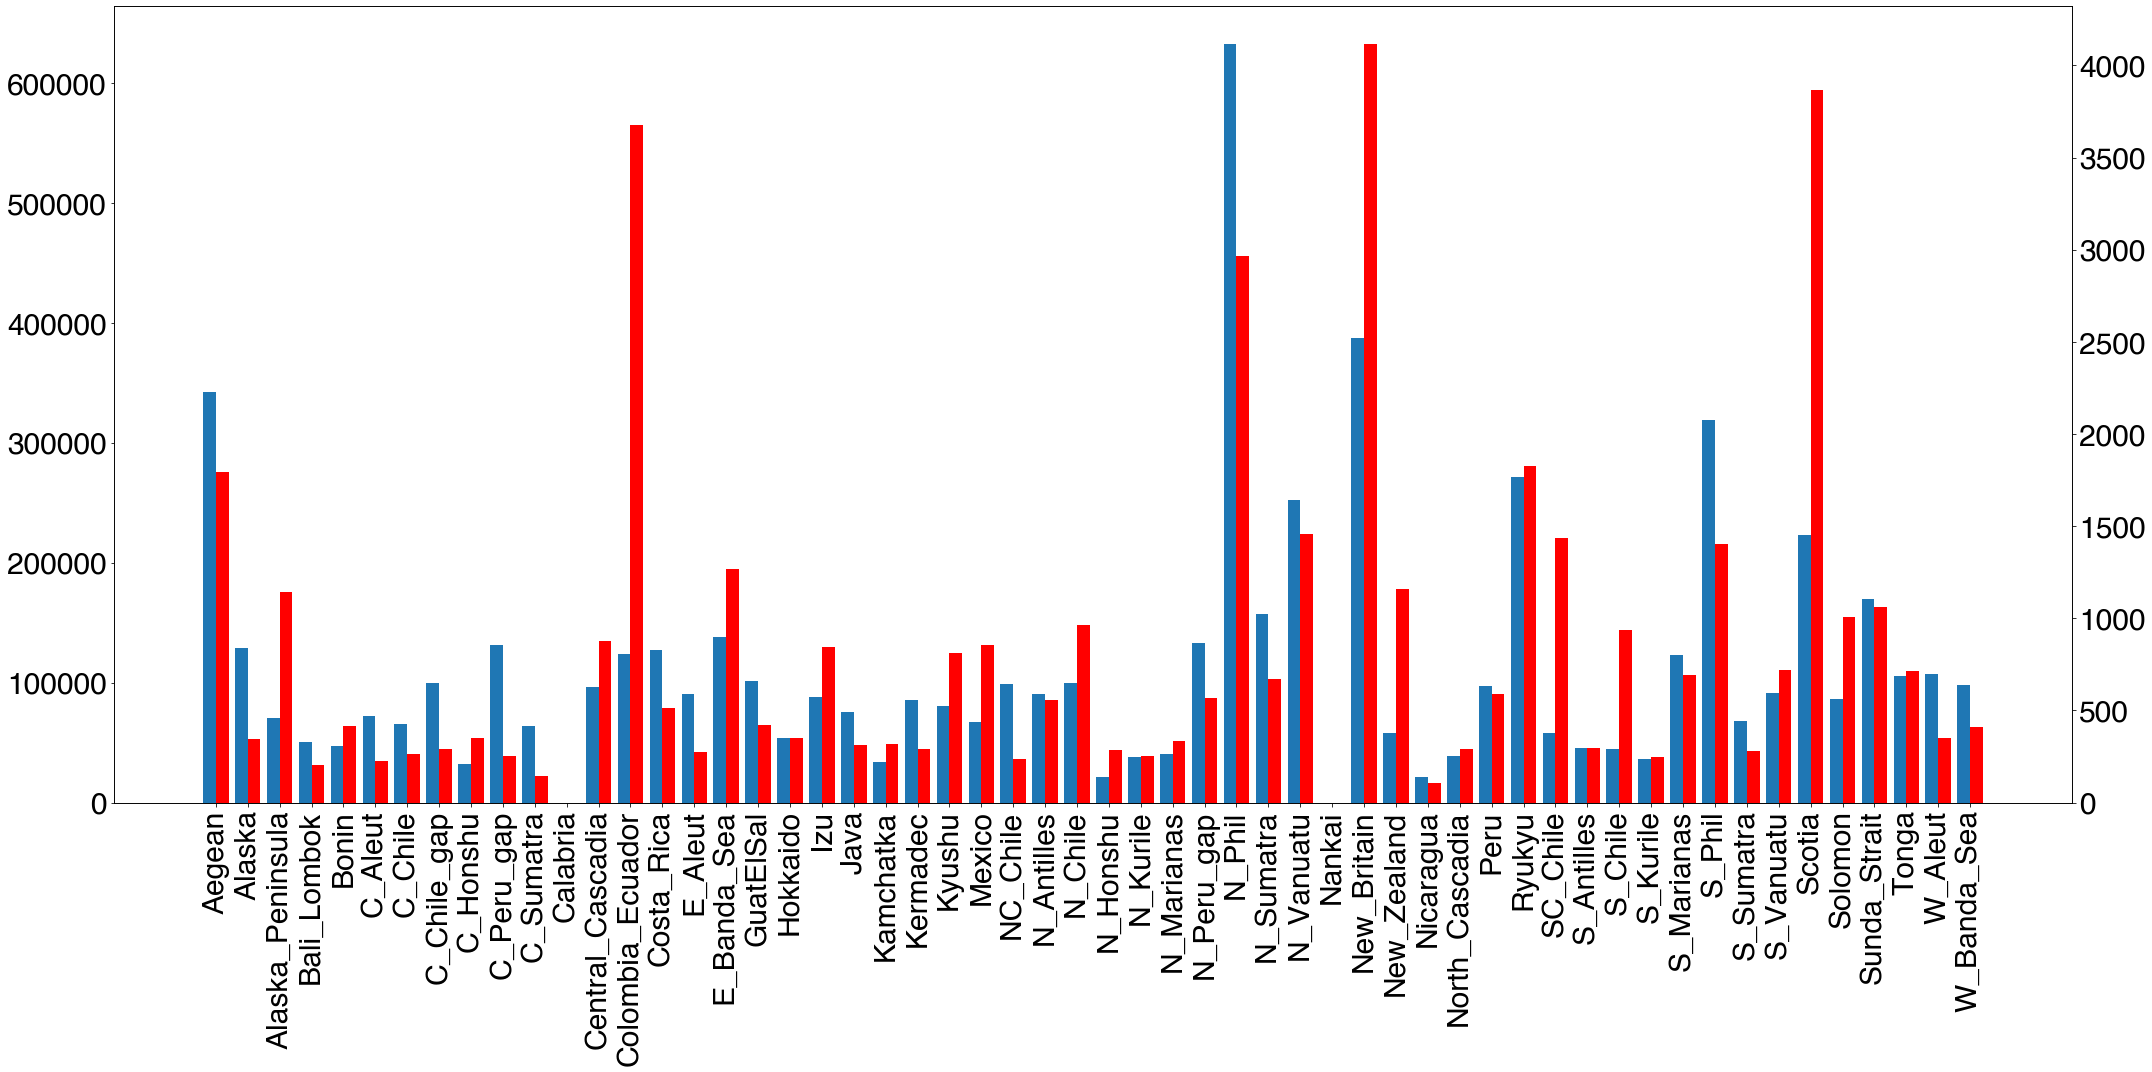

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,15))
x = np.arange(0,len(sub_results_vals),1)
ax2 = ax.twinx()
width=0.4
ax.bar(x-width, sub_results_vals, width=width, align='edge')
ax2.bar(x, sub_results_vals_area, width=width, color='red', align='edge')
ax.set_xticks(x)#+width)
ax.set_xticklabels(sub_results_names, rotation = 90, ha='center')
ax.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
plt.tight_layout()

In [12]:
results_df.style.background_gradient(cmap=cm.batlow)

,sub_zones,sub_results_vals,sub_results_vals_area
0,Aegean,342129.532557,1795.358312
1,Alaska,128800.249625,345.966576
2,Alaska_Peninsula,70424.999350,1141.107791
3,Bali_Lombok,50657.262675,203.571039
4,Bonin,47488.035189,417.704618
5,C_Aleut,72435.164437,224.350822
6,C_Chile,65521.538475,261.087306
7,C_Chile_gap,99737.650166,291.594987
8,C_Honshu,31965.609441,352.528037
9,C_Peru_gap,131486.887268,254.171196


In [13]:
for ind, i in enumerate(sub_names):
    print(i, 'DIP: mean | std | result ||', individual_track_dip[ind][1], '|',individual_track_dip[ind][2], '|', sub_results_area[ind][1])
    print(i, 'CR: mean | std | result ||', individual_track_CR[ind][1], '|',individual_track_CR[ind][2], '|', sub_results_area[ind][1])    
    print(i, 'SR: mean | std | result ||', individual_track_SR[ind][1], '|',individual_track_SR[ind][2], '|', sub_results_area[ind][1])

Aegean DIP: mean | std | result || 26.1077804331186 | 15.098668785646694 | 1795.3583121553975
Aegean CR: mean | std | result || 18.103848951581313 | 0.0 | 1795.3583121553975
Aegean SR: mean | std | result || 1.4144419315597931 | 2.220446049250313e-16 | 1795.3583121553975
Alaska DIP: mean | std | result || 18.94629997798158 | 16.247791264630457 | 345.9665763325472
Alaska CR: mean | std | result || 20.481707000641748 | 19.929541638542474 | 345.9665763325472
Alaska SR: mean | std | result || 47.873553697814785 | 15.286986334691258 | 345.9665763325472
Alaska_Peninsula DIP: mean | std | result || 27.258523910893548 | 15.182248115473406 | 1141.1077913144127
Alaska_Peninsula CR: mean | std | result || 29.716266393525547 | 22.019438254513442 | 1141.1077913144127
Alaska_Peninsula SR: mean | std | result || 56.162556333275866 | 6.046728728523186 | 1141.1077913144127
Bali_Lombok DIP: mean | std | result || 39.33775446258916 | 11.793913620969592 | 203.57103857790867
Bali_Lombok CR: mean | std | re

In [14]:
#so if we plot multiple time we don't have to recalcualte everything
reconstructed_polygons = []
reconstructed_isochrons = []
reconstructed_COBs = []

# Alternative method using 'partition_geometry'
resolved_topologies = []
shared_boundary_sections = []

pygplates.resolve_topologies(input_topology_filename, rotation_model,
                             resolved_topologies, int(time), shared_boundary_sections)
#deterministic output
shared_boundary_sections = sorted(shared_boundary_sections, key=lambda section : section.get_feature().get_feature_id().get_string())


pygplates.reconstruct(coastlines,rotation_model, reconstructed_polygons, int(time))
pygplates.reconstruct(COBs,rotation_model, reconstructed_COBs, int(time))
pygplates.reconstruct(isochrons,rotation_model, reconstructed_isochrons, int(time))


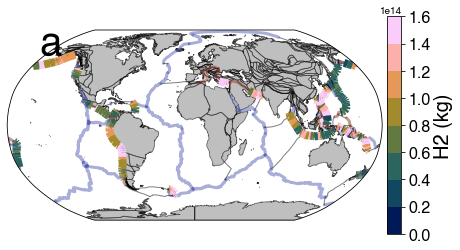

In [15]:
#get colour intervals
contour_levels=np.arange(0, 1.8e14, 2e13)
norm = BoundaryNorm(contour_levels, ncolors=cm.batlow.N, clip=True)

time = 0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4),
                       subplot_kw={'projection': ccrs.Robinson(central_longitude=0)})

data_crs = ccrs.Geodetic()
poly_data_crs = ccrs.PlateCarree()
date_line_wrapper = pygplates.DateLineWrapper(0)

for polygon in reconstructed_polygons:
    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
    for wrapped_poly in wrapped_polys:
        wrapped_poly_lat = []
        wrapped_poly_lon = []
        for wrapped_poly_point in wrapped_poly.get_exterior_points():
            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())

        ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=0.5 ,zorder=0, alpha=0.5, transform=poly_data_crs)
        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
                linewidth=1 ,zorder=0, transform=poly_data_crs)
#for polygon in reconstructed_COBs:
#    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
#    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
#    for wrapped_poly in wrapped_polys:
#        wrapped_poly_lat = []
#        wrapped_poly_lon = []
#        for wrapped_poly_point in wrapped_poly.get_exterior_points():
#            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
#            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())
#
#        #ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=1 ,zorder=0, transform=poly_data_crs)
#        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
#                linewidth=1 ,zorder=0, transform=poly_data_crs)

for shared_boundary_section in shared_boundary_sections:
    if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#545eb3',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)

    elif shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#853a2b',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)                
    else:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='k',
                        linewidth=1, alpha=0.5, zorder=1, transform=data_crs)

#flatten lists for plotting
#flat_sub_coords = [item for sublist in new_sub_coords for item in sublist]
flat_relevant_segments = [item for sublist in correct_segment_order for item in sublist]
flat_individual_track_perid_area_total = [item for sublist in individual_track_perid_area_total for item in sublist]
flat_individual_track_perid_total = [item for sublist in individual_track_perid_total for item in sublist]
#flat_sub_coords = [item for sublist in new_sub_coords for item in sublist]

#for plotting scatterplot               
#for ind, i in enumerate(flat_sub_coords):
#    cs = ax.scatter(i[0],i[1],c=np.nansum(flat_individual_track_perid_total[ind])*perid_density_kg_km3*10e-2/(1.00784*2), s=70, 
#                    zorder=2,vmin=1e15,vmax=1e16, transform=poly_data_crs, cmap=cm.batlow)#

#thank you nicky!!!
#ohhhhhhh 10e-2 is the moles of H2 generated per kg of rock from Alberto
H2_area = np.asarray(flat_individual_track_perid_area_total)*perid_density_kg_km3*10e-2*1.00784*2

s1 = LineCollection(flat_relevant_segments, array=H2_area,
                    cmap=cm.batlow, norm=norm, linewidths=8, transform=data_crs)#, rasterized=True)

line = ax.add_collection(s1)  # this is the actual plotting line!! Don't forget to include it.


cbar = fig.colorbar(line,  ax=ax, aspect=15, pad=0.01, ticks=contour_levels)
cbar.set_label('H2 (kg)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

ax.set_global()
fig.suptitle('a', x=0.20,y=0.85, fontsize=40)

plt.savefig('%sPresent_day_h2.pdf' % figuredir)#,  dpi=200)

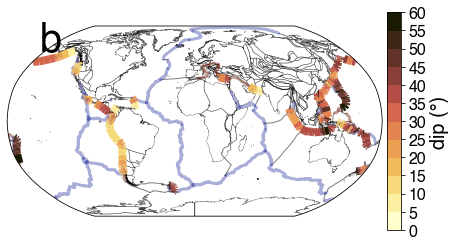

In [23]:
#get colour intervals
contour_levels=np.arange(0, 65, 5)
norm = BoundaryNorm(contour_levels, ncolors=cm.lajolla.N, clip=True)

time = 0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4),
                       subplot_kw={'projection': ccrs.Robinson(central_longitude=0)})

data_crs = ccrs.Geodetic()
poly_data_crs = ccrs.PlateCarree()
date_line_wrapper = pygplates.DateLineWrapper(0)

for polygon in reconstructed_polygons:
    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
    for wrapped_poly in wrapped_polys:
        wrapped_poly_lat = []
        wrapped_poly_lon = []
        for wrapped_poly_point in wrapped_poly.get_exterior_points():
            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())

        ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=0.5 ,zorder=0, alpha=0.5, transform=poly_data_crs)
#        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
#                linewidth=1 ,zorder=0, transform=poly_data_crs)
#for polygon in reconstructed_COBs:
#    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
#    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
#    for wrapped_poly in wrapped_polys:
#        wrapped_poly_lat = []
#        wrapped_poly_lon = []
#        for wrapped_poly_point in wrapped_poly.get_exterior_points():
#            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
#            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())
#
#        #ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=1 ,zorder=0, transform=poly_data_crs)
#        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
#                linewidth=1 ,zorder=0, transform=poly_data_crs)

for shared_boundary_section in shared_boundary_sections:
    if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#545eb3',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)

    elif shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#853a2b',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)                
    else:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='k',
                        linewidth=1, alpha=0.5, zorder=1, transform=data_crs)

#flatten lists for plotting
#flat_sub_coords = [item for sublist in new_sub_coords for item in sublist]
flat_relevant_segments = [item for sublist in correct_segment_order for item in sublist]
flat_individual_track_dip_all = [item for sublist in individual_track_dip_all for item in sublist]

#for scatterplot plotting
#for ind, i in enumerate(flat_sub_coords):
#    cs = ax.scatter(i[0],i[1],c=np.nansum(flat_individual_track_dip_all[ind]), s=100, 
#                    zorder=2,vmin=0,vmax=60, transform=poly_data_crs, cmap=cm.batlow)#

#thank you nicky!!!
s1 = LineCollection(flat_relevant_segments, array=(np.asarray(flat_individual_track_dip_all)),
                    cmap=cm.lajolla, norm=norm, linewidths=8, transform=data_crs)#, rasterized=True)

line = ax.add_collection(s1)  # this is the actual plotting line!! Don't forget to include it.


cbar = fig.colorbar(line,  ax=ax, aspect=15, pad=0.01, ticks=contour_levels)
cbar.set_label('dip (°)', fontsize=20)
cbar.ax.tick_params(labelsize=16)

ax.set_global()

fig.suptitle('b', x=0.20,y=0.85, fontsize=40)

ax.set_global()

#plt.savefig('%sPresent_day_dip.pdf' % figuredir)#,  dpi=200)

In [32]:
individual_track_perid_total

[[31654.938004748637,
  18424.073125280174,
  58792.23631144264,
  45414.438143835585,
  164576.7481274796,
  23267.098844088287],
 [69989.8550687612, 58810.394556266794],
 [14688.4736704162,
  9492.28318802004,
  11561.549023859581,
  7633.333091051794,
  8875.720477869958,
  10612.715831511448,
  7560.924067076392],
 [17502.20817893107, 33155.05449595615],
 [8493.690170654483,
  9497.967645955478,
  9676.742323562486,
  10345.700416348443,
  9473.934632857761],
 [72435.16443693377],
 [21958.043577815108, 43563.49489690802],
 [62280.14676147126, 37457.503404249466],
 [1883.6848506938786,
  6873.1118010761165,
  8616.01728120797,
  9849.033665949357,
  4743.761841611899],
 [58511.9478080459, 72974.93945998947],
 [64140.689911812304],
 [],
 [3589.0731204602343,
  9960.463012555438,
  18662.33954894906,
  26472.068786829437,
  16947.255376263507,
  9412.099251912921,
  11525.374027121055],
 [6828.70647582966,
  5289.5283849279895,
  7348.239384147867,
  4076.1289156139455,
  3565.9036598

In [37]:
#total perid calculations, this is less than in the antigorite notebook because... :
total_perid = np.sum(np.sum(individual_track_perid_total))
total_perid/1000000/5

1.2558425557063233

In [26]:
#total h2 calculations
#H2 is total moles 
H2_total_moles = np.sum(np.asarray(flat_individual_track_perid_total)*perid_density_kg_km3*10e-2)
H2_total_kg = H2_total_moles *1.00784*2
H2_total_MT = H2_total_kg * 1e-9
H2_total_MT/1000000/5

835.3543184864204

In [13]:
#seafloor consumption of east et al. 2019 for last 5 Ma (rough)
area_km2_per_1Ma = 3000000
ocean_crust_thickness = 6
ocean_crust_flux_per_1Ma = area_km2_per_1Ma * ocean_crust_thickness
our_RAP_vol_per_5Ma = np.sum(flat_individual_track_perid_total)
print(ocean_crust_flux_per_1Ma)
print(our_RAP_vol_per_5Ma)

18000000
6279212.778531617


In [32]:
np.sum(flat_individual_track_perid_total)

6425288.840938618

In [19]:
6608290.726767528/(ocean_crust_flux_per_1Ma*5)*100


7.342545251963919

In [20]:
our_RAP_vol_per_5Ma/(ocean_crust_flux_per_1Ma*5)*100

6.180702667179943

In [ ]:
#seafloor Production worman
SP_slow = 1.6 * 32300* 24
slow = 4 * 32300* 24
SP_fast = .5 * 28700* 76 
fast = 6 * 28700* 76

In [ ]:
SP_slow/(slow+fast)

In [ ]:
(SP_slow+SP_fast)/(slow+fast)*100

In [ ]:
np.sum(res)*perid_density_kg_km3*10e-2/(1.00784*2)/5/1000000

In [ ]:
4e-2/1.00784*2

In [293]:
#convert to alberto
#15wt%
total_water_in_antigorite_kg = 0.15 * perid_density_kg_km3 * np.sum(flat_individual_track_perid_total)
total_water_to_react_kg3 = total_water_in_antigorite_kg
total_perid_to_react = total_water_to_react_kg3
#assumes 1:1 fluid:rock
#assumes for each kg of reactant upper and lower value are how much H2 is formed
upper_value_moles = 4e-2 # mol 
lower_value_moles = 1.5e-3 # mol
upper_value_kg = 4e-2 * 1.00784 * 2 / 1000
lower_value_kg = 1.5e-3 * 1.00784 * 2 / 1000
upper_total_H2_kg = upper_value_kg * total_perid_to_react
lower_total_H2_kg = lower_value_kg * total_perid_to_react
upper_total_H2_MT = upper_total_H2_kg / 1000000000
lower_total_H2_MT = lower_total_H2_kg / 1000000000
upper_total_H2_moles = upper_value_moles * total_perid_to_react
lower_total_H2_moles = lower_value_moles * total_perid_to_react
print('water (kg)',total_water_to_react_kg3)
print('upper H2 (kg per 5 Ma)', upper_total_H2_kg)
print('lower H2 (kg per 5 Ma)', lower_total_H2_kg)
print('upper H2 (MT per 5 Ma)', upper_total_H2_MT)
print('lower H2 (MT per 5 Ma)', lower_total_H2_MT)
print('upper H2 (kg per a)', upper_total_H2_kg/1000000/5)
print('lower H2 (kg per a)', lower_total_H2_kg/1000000/5)
print('upper H2 (MT per a)', upper_total_H2_MT/1000000/5)
print('lower H2 (MT per a)', lower_total_H2_MT/1000000/5)

water (kg) 3.10821032537315e+18
upper H2 (kg per 5 Ma) 250606295545926.1
lower H2 (kg per 5 Ma) 9397736082972.229
upper H2 (MT per 5 Ma) 250606.29554592608
lower H2 (MT per 5 Ma) 9397.73608297223
upper H2 (kg per a) 50121259.10918522
lower H2 (kg per a) 1879547.2165944458
upper H2 (MT per a) 0.05012125910918521
lower H2 (MT per a) 0.001879547216594446


In [ ]:
1879547.2165944458

In [ ]:
4e-2*total_water_in_antigorite_kg/1000000/5/1000000000

In [ ]:
3.65e-2*1.00784*2

In [ ]:
#5.5e10
#2.1e9

In [ ]:
693744605839.4714
total_water_to_react_kg3/1000000/5

In [ ]:
3.3e12*4e-2/1000000000

In [ ]:
3.3e12*0.04

In [ ]:
perid_density_kg_km3 * np.sum(flat_individual_track_perid_total)

In [ ]:
2e-2

In [24]:
#vitale brovarone 2017 comparison
H2_VB17_MT_a = 0.8
H2_VB17_kg_a = H2_VB17_MT_a * 1e9
H2_VB17_kg_a



800000000.0

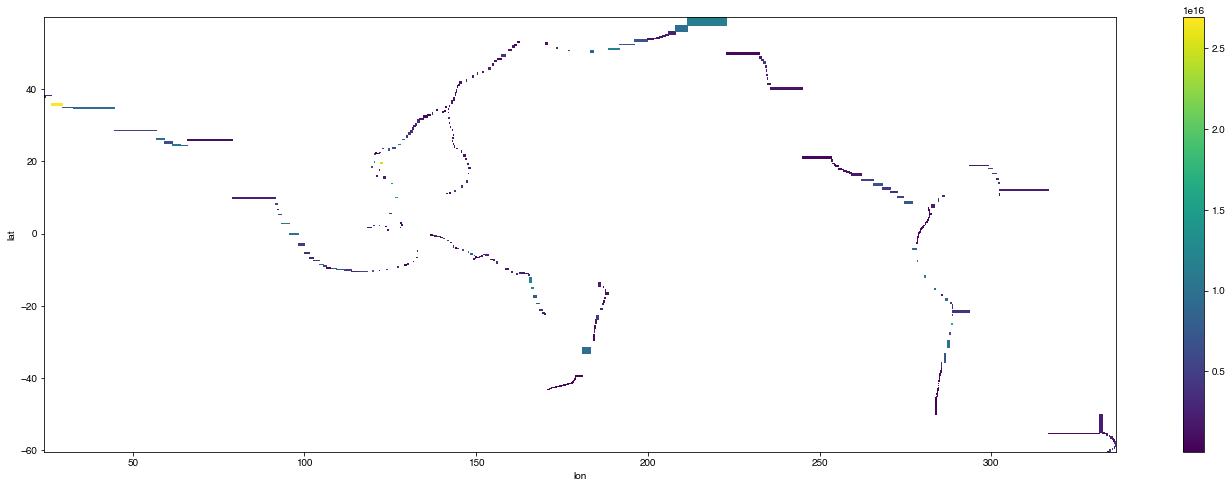

In [85]:
import xarray as xr
lat_results = []
lon_results = []
H2_vals = []
for ind, i in enumerate(flat_sub_coords):
    lat_results.append(i[1])
    lon_results.append(i[0])
    H2_vals.append(flat_individual_track_perid_total[ind]*perid_density_kg_km3*10e-2/(1.00784*2))
lat_results = np.asarray(lat_results)
lon_results = np.asarray(lon_results)

H2_vals = np.asarray(H2_vals)

df = pd.DataFrame({'H2':H2_vals, 'lat':lat_results, 'lon':lon_results})
df_pv = df.pivot(index='lat', columns='lon')
df_pv = df_pv.droplevel(0, axis=1)

da = xr.DataArray(data=df_pv)

da.plot.pcolormesh(figsize=(24,8))

In [87]:
da

<xarray.DataArray (lat: 340, lon: 340)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 -60.31 -60.13 -59.63 -59.11 ... 55.39 56.49 58.81
  * lon      (lon) float64 24.42 24.84 27.67 31.52 ... 335.7 335.8 336.0 336.1

In [96]:
test_da = da.coarsen(lat=4).mean().coarsen(lon=4).mean()


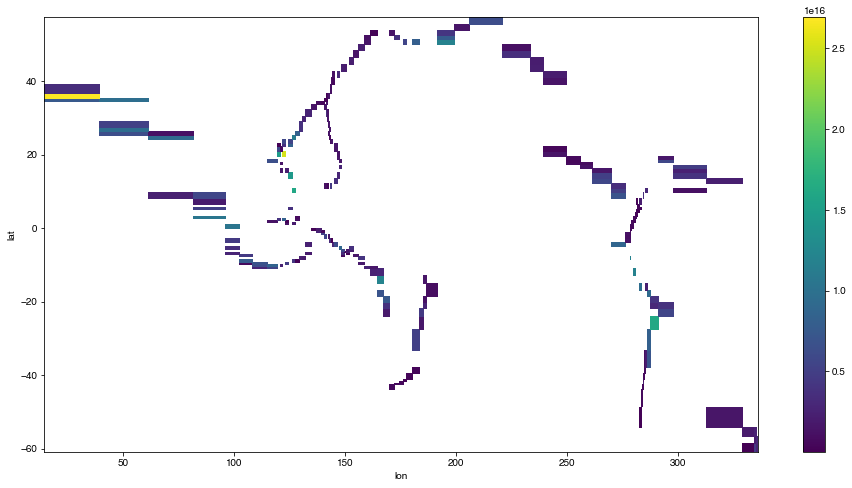

In [97]:
test_da.plot.pcolormesh(figsize=(16,8))

In [95]:
np.sum(da)

<xarray.DataArray ()>
array(1.02801051e+18)